In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving employees.csv to employees.csv


In [3]:
data = pd.read_csv('employees.csv')

In [4]:
data

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
print(data.isnull().sum())

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64


In [7]:
data = data.dropna()    # Dropping the missing values.
data.count()

,0
First Name,764
Gender,764
Start Date,764
Last Login Time,764
Salary,764
Bonus %,764
Senior Management,764
Team,764


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         764 non-null    object 
 1   Gender             764 non-null    object 
 2   Start Date         764 non-null    object 
 3   Last Login Time    764 non-null    object 
 4   Salary             764 non-null    int64  
 5   Bonus %            764 non-null    float64
 6   Senior Management  764 non-null    object 
 7   Team               764 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 53.7+ KB


<Axes: xlabel='Salary'>

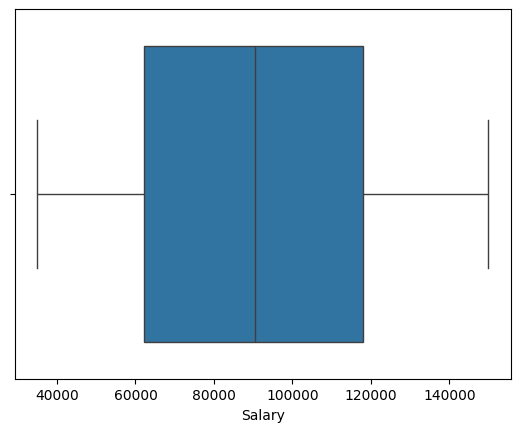

In [9]:
sns.boxplot(x=data['Salary']) #ouliers can be detected for numerical values only

In [10]:
X = data['Salary'] #data scaling can be done for numerical values only


In [11]:
X

,Salary
0,97308
2,130590
3,138705
4,101004
5,115163
...,...
994,98874
996,42392
997,96914
998,60500


StandardScaler expects a 2-dimensional array or a pandas.DataFrame, but we have a pandas.Series (1-dimensional data) that must be converted to a DataFrame of a pandas.Series.

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [13]:
scaler1 = MinMaxScaler().fit(X.to_frame())
rescaledX1 = scaler1.transform(X.to_frame())
rescaledX1[:5]

array([[0.5421907 ],
       [0.83186388],
       [0.90249358],
       [0.5743592 ],
       [0.69759345]])

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler2 = StandardScaler().fit(X.to_frame())
rescaledX2 = scaler2.transform(X.to_frame())
rescaledX2[:5]



array([[0.2093223 ],
       [1.2226843 ],
       [1.46976778],
       [0.32185718],
       [0.75296687]])

Select features based on their data type

In [16]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['First Name',
 'Gender',
 'Start Date',
 'Last Login Time',
 'Senior Management',
 'Team']

Show categorical variables

In [17]:
data_categorical = data[categorical_columns]
data_categorical

,First Name,Gender,Start Date,Last Login Time,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,False,Legal
...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,False,Product
998,Larry,Male,4/20/2013,4:45 PM,False,Business Development


Drop unnecessary data from data_categorical

In [18]:
data_categorical = data_categorical.drop(columns=['First Name', 'Start Date', 'Last Login Time', 'Senior Management'])

In [19]:
data_categorical

,Gender,Team
0,Male,Marketing
2,Female,Finance
3,Male,Finance
4,Male,Client Services
5,Male,Legal
...,...,...
994,Male,Marketing
996,Male,Finance
997,Male,Product
998,Male,Business Development


Encoding nominal categories

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [21]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

,Gender_Female,Gender_Male,Team_Business Development,Team_Client Services,Team_Distribution,Team_Engineering,Team_Finance,Team_Human Resources,Team_Legal,Team_Marketing,Team_Product,Team_Sales
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
